In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 7.1MB 31kB/s  eta 0:00:01     |███████▉                        | 1.7MB 1.9MB/s eta 0:00:03a 0:00:02
ERROR: azureml-train-automl 1.0.72 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-train-automl 1.0.72 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.22.1 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement onnxmltools==1.4.1, but you'll have onnxmltools 1.6.0 which is incompatible.
ERROR: azureml-automl-core 1.0.72.1 has requirement scikit-learn<=0.20.3,>=0.19.0, but you'll have scikit-learn 0.22.1 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import math
from datetime import datetime
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

In [3]:
nce = pd.read_excel('./SABRE NCe Data.xlsx', sheet_name='SABRE 2018-2019 Data')
#Parse string to datetime type
nce['Date Opened'] = nce['Date Opened'].dt.strftime('%Y-%m')
nce['Date Opened'] = pd.to_datetime(nce['Date Opened'], infer_datetime_format = True, format='%Y%m')
analysis = nce[['Date Opened','NCe']]
print(analysis.head(5))

df = analysis.groupby('Date Opened', as_index=False).count()
df = analysis.groupby('Date Opened', as_index=False).count()
print(df.head(5))

df = df[12:24]
indexedNce = df.set_index(['Date Opened'])
print(indexedNce)

  Date Opened     NCe
0  2018-01-01  295356
1  2018-01-01  295357
2  2018-01-01  295358
3  2018-01-01  295375
4  2018-01-01  295389
  Date Opened  NCe
0  2018-01-01  163
1  2018-02-01  120
2  2018-03-01  129
3  2018-04-01  109
4  2018-05-01   98
             NCe
Date Opened     
2019-01-01    85
2019-02-01    72
2019-03-01    51
2019-04-01    96
2019-05-01    84
2019-06-01    81
2019-07-01    71
2019-08-01    58
2019-09-01    82
2019-10-01    84
2019-11-01    72
2019-12-01    75


In [4]:
nce.head()

NCe                       Current State Business Unit  \
0  295356  Closed - No Investigation Required           NaN   
1  295357  Closed - No Investigation Required           DEP   
2  295358  Closed - No Investigation Required           DEP   
3  295375  Closed - No Investigation Required           NaN   
4  295389  Closed - No Investigation Required           DEP   

   Customer Involvement Impact                        Customer Name  \
0                          NaN        TAIWAN SEMICONDUCTOR MFG. CO.   
1                          NaN        TAIWAN SEMICONDUCTOR MFG. CO.   
2                          NaN        TAIWAN SEMICONDUCTOR MFG. CO.   
3                          NaN  Advance Semiconductor Engineering I   
4                          NaN  SMIC Advanced Technology Research &   

  Customer Temperature Impact Safety Impact Wafer Scrap Impact  \
0                     Unknown            No                 No   
1                     Unknown            No                 No   
2                     Unknown            No                 No   
3                         Hot            No                 No   
4                        Warm            No                 No   

  Customer Tracking Number Date Opened       ...        Start Up Date  \
0                      NaN  2018-01-01       ...           2017-12-20   
1                      NaN  2018-01-01       ...           2017-12-20   
2                      NaN  2018-01-01       ...           2017-12-20   
3                      NaN  2018-01-01       ...           2016-12-23   
4                      NaN  2018-01-01       ...           2017-11-29   

  Warranty End IBASE SO Line MyLam System  Opportunity Type Desc  \
0   2018-12-19            20    SABRE MAX  PG System Opportunity   
1   2018-12-19            20    SABRE MAX  PG System Opportunity   
2   2018-12-19            20    SABRE MAX  PG System Opportunity   
3   2018-02-22            20     SABRE 3D  PG System Opportunity   
4   2019-01-28            20  SABRE EXCEL  PG System Opportunity   

   IBASE Catalog Profile  Investigation     Investigation Created RCCA  \
0              DELCTFILL            NaN  No Investigation Created  NaN   
1              DELCTFILL            NaN  No Investigation Created  NaN   
2              DELCTFILL            NaN  No Investigation Created  NaN   
3              DELCTFL3D            NaN  No Investigation Created  NaN   
4              DELCTFILL            NaN  No Investigation Created  NaN   

      RCCA Created  
0  No RCCA Created  
1  No RCCA Created  
2  No RCCA Created  
3  No RCCA Created  
4  No RCCA Created  

[5 rows x 64 columns]

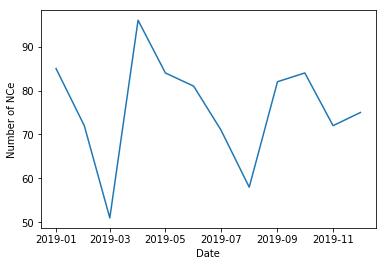

In [5]:
## Plot Graph

plt.xlabel('Date')
plt.ylabel('Number of NCe')
plt.plot(indexedNce)

In [6]:
#Determining Rolling Statistics

rolmean = indexedNce.rolling(window = 2).mean()
rolstd = indexedNce.rolling(window = 2).std()
print(rolmean, rolstd)


              NCe
Date Opened      
2019-01-01    NaN
2019-02-01   78.5
2019-03-01   61.5
2019-04-01   73.5
2019-05-01   90.0
2019-06-01   82.5
2019-07-01   76.0
2019-08-01   64.5
2019-09-01   70.0
2019-10-01   83.0
2019-11-01   78.0
2019-12-01   73.5                    NCe
Date Opened           
2019-01-01         NaN
2019-02-01    9.192388
2019-03-01   14.849242
2019-04-01   31.819805
2019-05-01    8.485281
2019-06-01    2.121320
2019-07-01    7.071068
2019-08-01    9.192388
2019-09-01   16.970563
2019-10-01    1.414214
2019-11-01    8.485281
2019-12-01    2.121320


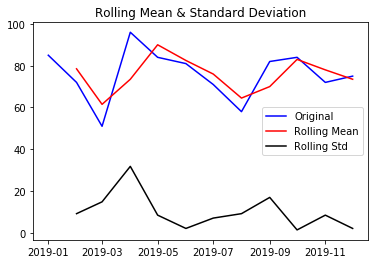

In [7]:
#Plot Rolling Statistics

orig = plt.plot(indexedNce, color = 'blue',label = 'Original')
mean = plt.plot(rolmean,color = 'red',label = 'Rolling Mean')
std = plt.plot(rolstd ,color = 'black',label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [8]:

#Performing Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

dftest = adfuller(indexedNce['NCe'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test-Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Test-Statistics               -3.509950
p-value                        0.007735
#Lags Used                     2.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [9]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining Rolling Statistics
    movingAvg = timeseries.rolling(window = 2).mean()
    movingStd = timeseries.rolling(window = 2).std()
    #print(rolmean, rolstd)


    #Plot Rolling Statistics
    orig = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean = plt.plot(movingAvg,color = 'red',label = 'Rolling Mean')
    std = plt.plot(movingStd,color = 'black',label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Performing Dickey-Fuller Test
    print('Results of Dickey-Fuller Test ...')
    dftest = adfuller(timeseries['NCe'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test-Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

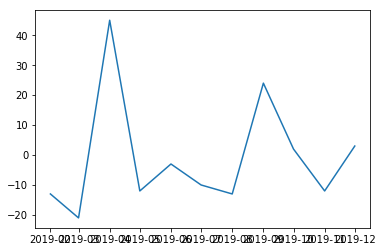

In [10]:
datasetDiffShifting = indexedNce- indexedNce.shift()
plt.plot(datasetDiffShifting)

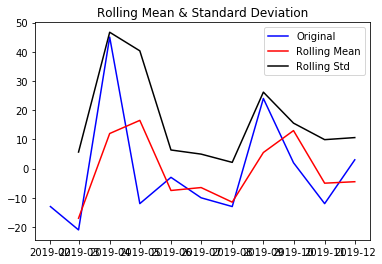

Results of Dickey-Fuller Test ...
Test-Statistics               -0.000000
p-value                        0.958532
#Lags Used                     4.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


In [11]:
datasetDiffShifting.dropna(inplace=True)
test_stationarity(datasetDiffShifting)

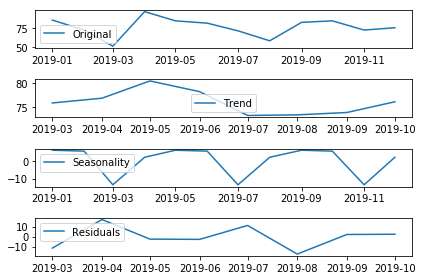

In [12]:
# Components of Time Series

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedNce, freq=4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedNce, label = 'Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

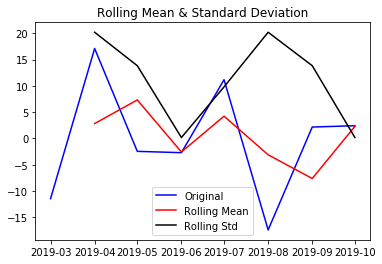

Results of Dickey-Fuller Test ...


ValueError: maxlag should be < nobs

In [13]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [14]:
datasetDiffShifting

NCe
Date Opened      
2019-02-01  -13.0
2019-03-01  -21.0
2019-04-01   45.0
2019-05-01  -12.0
2019-06-01   -3.0
2019-07-01  -10.0
2019-08-01  -13.0
2019-09-01   24.0
2019-10-01    2.0
2019-11-01  -12.0
2019-12-01    3.0

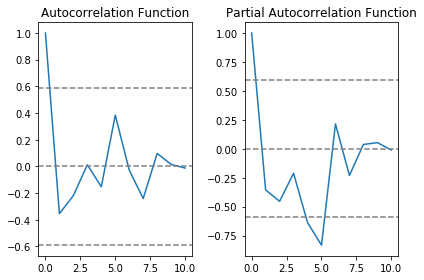

In [15]:
#ACF and #PACF Graphs

from statsmodels.tsa.stattools import acf, pacf
datasetDiffShifting.dropna(inplace=True)
lag_acf = acf(datasetDiffShifting, nlags = 10)
lag_pacf = pacf(datasetDiffShifting, nlags = 10, method = 'ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetDiffShifting)), linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetDiffShifting)), linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model
100.31085053845231


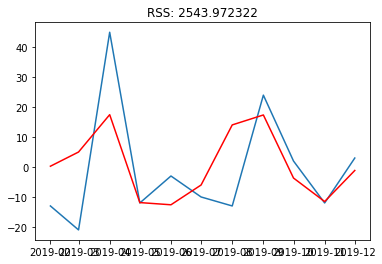

In [16]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedNce, order=(3,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_AR.fittedvalues-datasetDiffShifting['NCe'])**2))
print('Plotting AR Model')
print(results_AR.aic)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model
94.98082831947931


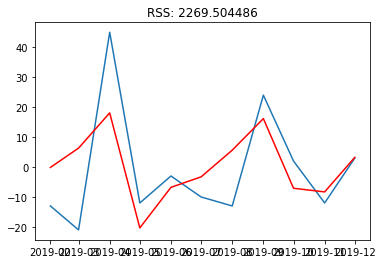

In [17]:
#MA model

model = ARIMA(indexedNce, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.plot(datasetDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_MA.fittedvalues-datasetDiffShifting['NCe'])**2))
print('Plotting MA Model')
print(results_MA.aic)

In [18]:
import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [19]:
import time
import warnings
warnings.filterwarnings('ignore')
start_time = time.time()
mRSS = sys.float_info.max
minParam = None
for param in pdq:
    try:
        model = ARIMA(indexedNce, order=param)
        results_ARIMA = model.fit(disp=-1)
        if not math.isnan(sum((results_ARIMA.fittedvalues-datasetDiffShifting['NCe'])**2)):
            print(param, results_ARIMA.aic, sum((results_ARIMA.fittedvalues-datasetDiffShifting['NCe'])**2))
        if mRSS > sum((results_ARIMA.fittedvalues-datasetDiffShifting['NCe'])**2):
            mRSS = sum((results_ARIMA.fittedvalues-datasetDiffShifting['NCe'])**2)
            minParam = param
    except:
        continue
print("Below are the best parameters:")
print(minParam,mRSS)
end_time = time.time()
print("Total time taken to get the best parameters (in seconds): ", int(end_time - start_time))


(0, 1, 1) 94.98082831947931 2269.504486389897
(1, 1, 0) 100.03706319115847 3304.3485063114385
(2, 1, 0) 99.33379882672048 2670.0002462889097
(2, 1, 3) 101.73365026402345 2177.715151395758
(3, 1, 0) 100.31085053845231 2543.9723216370626
(3, 1, 3) 100.4441754682997 1937.577669582875
(4, 1, 3) 98.2753204062503 1859.4931727114647
(4, 1, 5) 104.2027320996967 1891.8665565502629
(6, 1, 3) 94.47542513754358 1873.0567762118947
(7, 1, 2) 93.17372923319469 1993.2358209713138
(8, 1, 1) 94.30217943598936 1983.303915432399
Below are the best parameters:
(4, 1, 3) 1859.4931727114647
Total time taken to get the best parameters (in seconds):  1007


In [21]:
#ARIMA Model
model = ARIMA(indexedNce, order=(6,1,1))   
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %4f'% sum((results_ARIMA.fittedvalues-datasetDiffShifting['NCe'])**2))
print('Plotting ARIMA Model')
print(results_MA.aic)

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [22]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Date Opened
2019-01-01    75.972954
2019-02-01    74.195298
2019-03-01    73.209993
2019-04-01    85.633709
2019-05-01    81.324391
2019-06-01    71.558048
2019-07-01    70.627897
2019-08-01    53.552732
2019-09-01    81.005910
2019-10-01    84.770177
2019-11-01    71.558148
2019-12-01    75.205055
dtype: float64


In [23]:
#Convert to Cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date Opened
2019-01-01     75.972954
2019-02-01    150.168252
2019-03-01    223.378245
2019-04-01    309.011954
2019-05-01    390.336345
2019-06-01    461.894393
2019-07-01    532.522290
2019-08-01    586.075022
2019-09-01    667.080931
2019-10-01    751.851109
2019-11-01    823.409257
2019-12-01    898.614312
dtype: float64


Text(0.5, 1.0, 'RMSE: 560.7401')

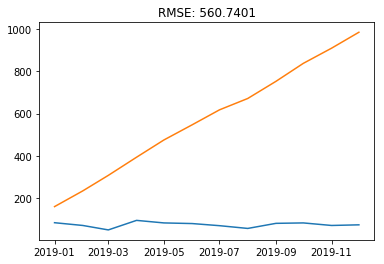

In [24]:
predictions_ARIMA_log = pd.Series(indexedNce['NCe'].ix[0], index=indexedNce.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log
plt.plot(indexedNce)
plt.plot(predictions_ARIMA_log)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_log-indexedNce['NCe'])**2)/len(indexedNce)))

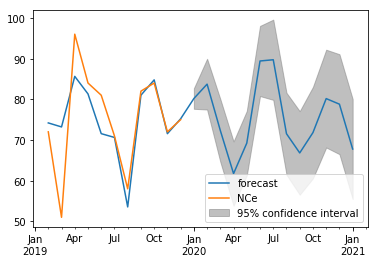

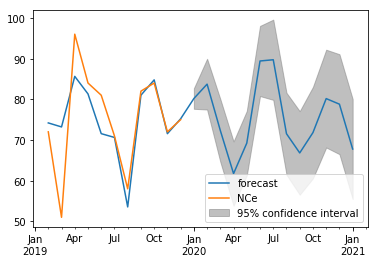

In [25]:
results_ARIMA.plot_predict(1,24)

In [26]:
x=results_ARIMA.forecast(steps=12)
a = x[0]
a

array([80.18284423, 83.72403448, 72.33339046, 61.74350469, 69.23953452,
       89.41379046, 89.71943124, 71.53604197, 66.82215924, 71.82193081,
       80.1737926 , 78.80178415])